In [46]:
import os
import pandas as pd
from radon.cli.tools import iter_filenames
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import subprocess
print(os.getcwd())

/data/Documents/DataScience/Courses/Dissertation/src/evaluation


## Complexity

In [16]:
def analyze_directory(directory, exclude_patterns=None):
    results = []
    exclude_str = ','.join(exclude_patterns) if exclude_patterns else None
    for filename in iter_filenames([directory], exclude_str):
        with open(filename, 'r') as file:
            content = file.read()

        cc_results = cc_visit(content)
        avg_cc = sum(result.complexity for result in cc_results) / len(cc_results) if cc_results else 0

        mi_result = mi_visit(content, False)

        raw_metrics = analyze(content)

        results.append({
            'filename': os.path.relpath(filename, directory),
            'avg_cc': avg_cc,
            'max_cc': max((result.complexity for result in cc_results), default=0),
            'mi': mi_result,
            'loc': raw_metrics.loc,
            'sloc': raw_metrics.sloc,
            'comments': raw_metrics.comments,
        })

    return pd.DataFrame(results)

In [17]:
directory = '../'
exclude_patterns = ['*helpers/*', '*evaluation/*']
df = analyze_directory(directory, exclude_patterns)

In [18]:
df.head(100)

,filename,avg_cc,max_cc,mi,loc,sloc,comments
0,runner.py,6.000000,9,43.444173,90,73,0
1,__init__.py,0.000000,0,100.000000,0,0,0
2,benchmark/run_all_benchmarks.py,4.000000,8,38.203306,203,166,1
3,benchmark/__init__.py,0.000000,0,100.000000,0,0,0
4,cegis/candidate_generator_base.py,1.166667,2,100.000000,27,18,1
5,cegis/synthesis_problem_base.py,2.368421,10,30.126953,339,132,0
6,cegis/synthesis_strategy_base.py,1.250000,2,100.000000,18,12,1
7,cegis/__init__.py,0.000000,0,100.000000,0,0,0
8,cegis/cvc5/candidate_generator_base.py,1.142857,2,100.000000,38,24,1
9,cegis/cvc5/random_candidate_generator.py,2.166667,5,48.916660,80,63,1


In [19]:
print("Overall Metrics:")
print(f"Average Cyclomatic Complexity: {df['avg_cc'].mean():.2f}")
print(f"Average Maintainability Index: {df['mi'].mean():.2f}")
print(f"Total Lines of Code: {df['loc'].sum()}")
print(f"Total Source Lines of Code: {df['sloc'].sum()}")
print(f"Total Comments: {df['comments'].sum()}")

df.to_csv('radon_analysis_results.csv', index=False)

Overall Metrics:
Average Cyclomatic Complexity: 3.02
Average Maintainability Index: 57.52
Total Lines of Code: 5376
Total Source Lines of Code: 3103
Total Comments: 22


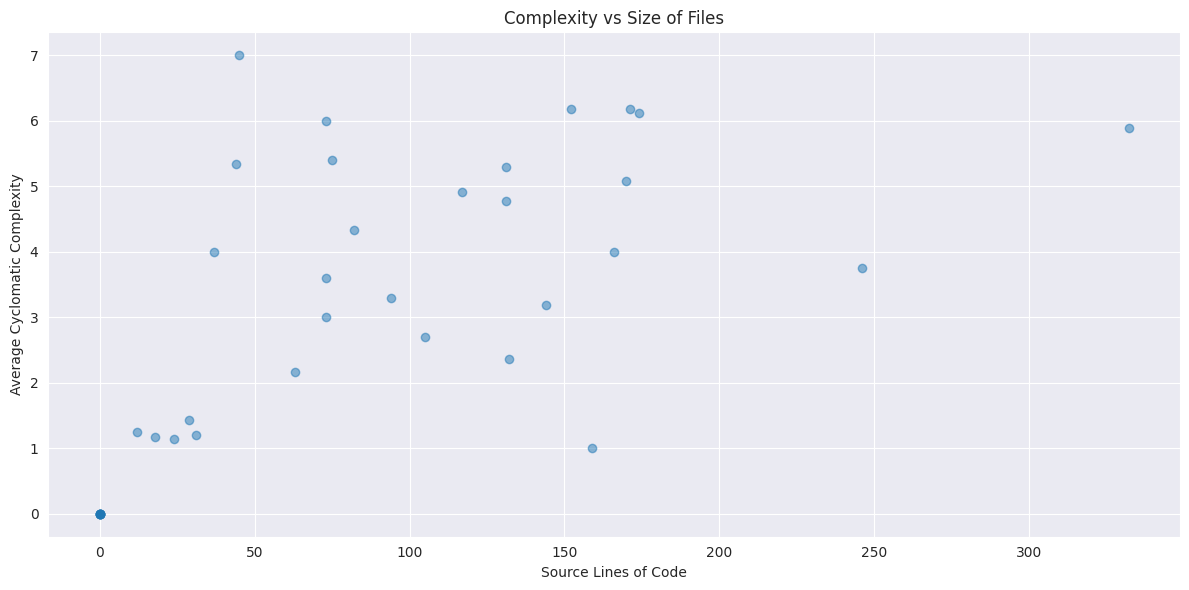

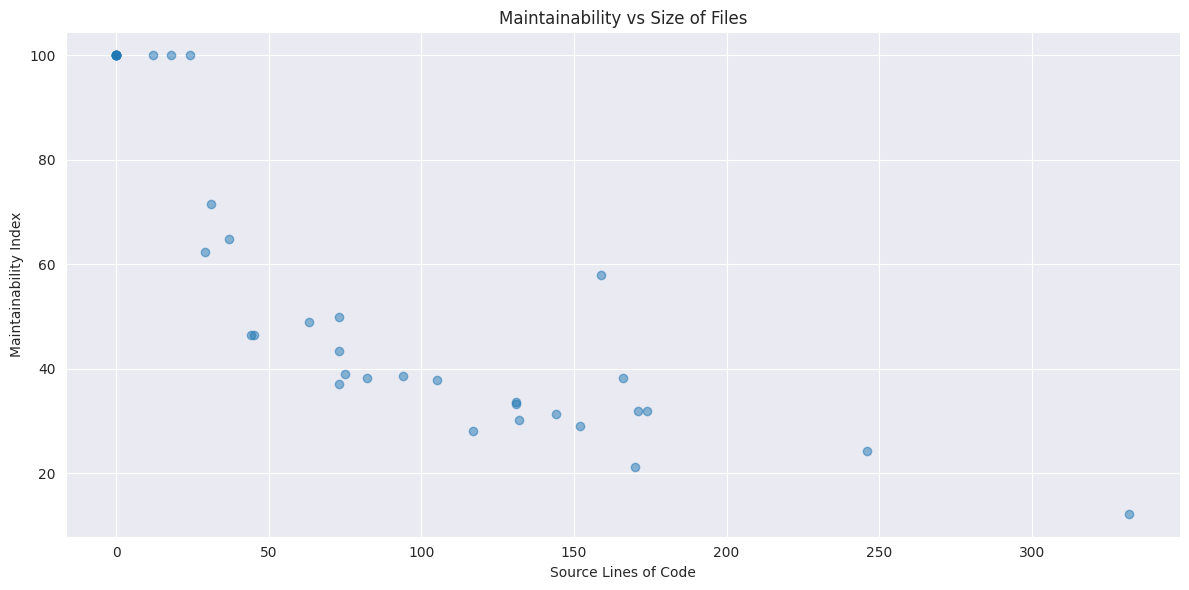

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sloc'], df['avg_cc'], alpha=0.5)
plt.xlabel('Source Lines of Code')
plt.ylabel('Average Cyclomatic Complexity')
plt.title('Complexity vs Size of Files')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['sloc'], df['mi'], alpha=0.5)
plt.xlabel('Source Lines of Code')
plt.ylabel('Maintainability Index')
plt.title('Maintainability vs Size of Files')
plt.tight_layout()
plt.show()

# PyLint Metrics

In [47]:
def run_pyreverse(directory, output_format='png'):
    command = [
        "pyreverse",
        "-o", output_format, 
        "-p", "PySynthLab",   
        directory
    ]

    print(f"Running command: {' '.join(command)}")

    try:
        subprocess.run(command, check=True, capture_output=True, text=True)
        print("Pyreverse ran successfully.")
        return True
    except subprocess.CalledProcessError as e:
        print(f"Pyreverse returned with error code {e.returncode}")
        print(f"Error output: {e.stderr}")
        return False

Running command: pyreverse -o png -p PySynthLab ../
Pyreverse ran successfully.
Class diagram generated: classes_PySynthLab.png


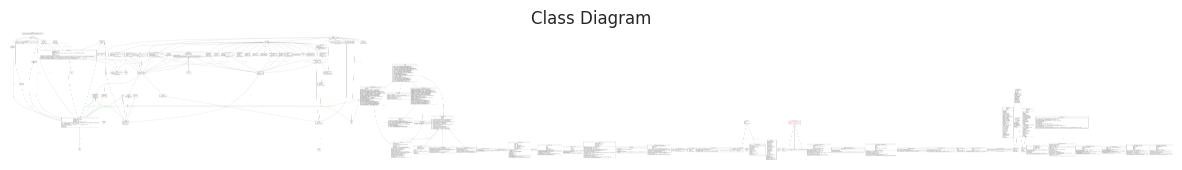

Package diagram generated: packages_PySynthLab.png


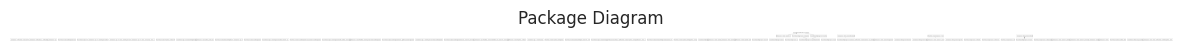

In [48]:
success = run_pyreverse(directory)

In [ ]:
class_diagram = 'classes_PySynthLab.png'
img = mpimg.imread(class_diagram)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Class Diagram')
plt.show()


In [ ]:
# package_diagram = 'packages_PySynthLab.png'
# 
# img = mpimg.imread(package_diagram)
# plt.figure(figsize=(15, 10))
# plt.imshow(img)
# plt.axis('off')
# plt.title('Package Diagram')
# plt.show()
